# Cardiovascular Disease Prection Using Machine Learning

### Importing the libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from rich import print

# For model training
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# For model performance evaluation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, mean_absolute_error

### Reading the data

In [4]:
# Reading the data from csv file
df = pd.read_csv("/content/cardio_train.csv",sep=';' , on_bad_lines='skip')
df.drop(['id'],axis=1,inplace=True)

Here is a detailed description of the features in your dataset:

- **Age**: The age of the individual, measured in days (integer).

- **Height**: The height of the individual in centimeters (integer).

- **Weight**: The weight of the individual in kilograms (float).

- **Gender**: The gender of the individual, represented as a categorical code (1 for male, 2 for female).

- **Systolic Blood Pressure (ap_hi)**: The systolic blood pressure reading (integer).

- **Diastolic Blood Pressure (ap_lo)**: The diastolic blood pressure reading (integer).

- **Cholesterol**: The cholesterol level, categorized as:
  - 1: Normal
  - 2: Above normal
  - 3: Well above normal

- **Glucose (gluc)**: The glucose level, categorized as:
  - 1: Normal
  - 2: Above normal
  - 3: Well above normal

- **Smoking (smoke)**: Indicates whether the individual smokes (binary: 0 for no, 1 for yes).

- **Alcohol Intake (alco)**: Indicates whether the individual consumes alcohol (binary: 0 for no, 1 for yes).

- **Physical Activity (active)**: Indicates whether the individual engages in physical activity (binary: 0 for no, 1 for yes).

- **Cardiovascular Disease (cardio)**: Indicates the presence or absence of cardiovascular disease (binary: 0 for no, 1 for yes).


### Exporatory data analysis

In [5]:
# Checking first 5 rows of the data frame
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
print(df.shape)

(70000, 12)

### ▶️ Visualizing the missing values (Using barplot and matrix plot)

For visualizing the missing values even thought both the bar plot and the matrix plot can be used but we should be very much carefully while using the matrix plot as sometimes if the missing values are very very less then there are high chances that our naked eyes might not be able to detect them using the matrix plot so should focus more on the barplot.

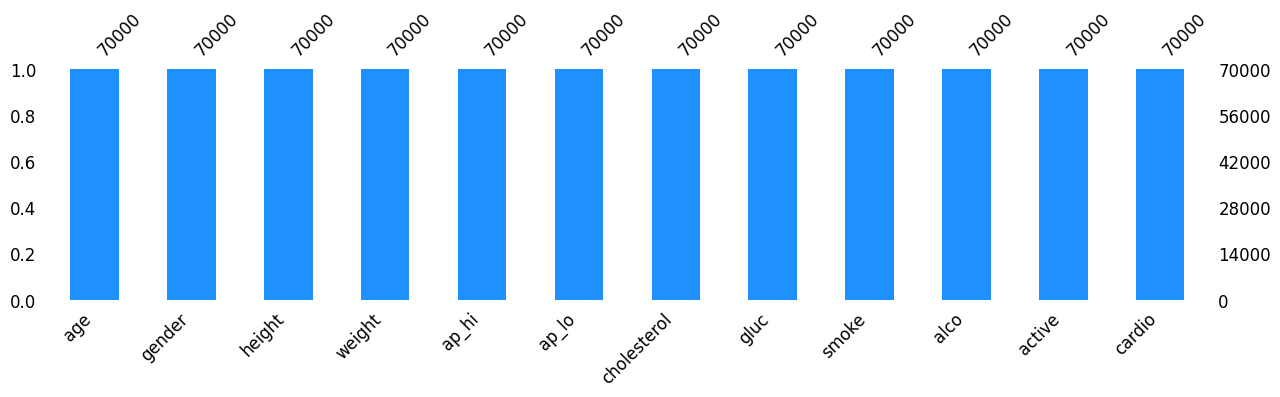

In [7]:
# Checking any null values
msno.bar(df, figsize=(15, 3), color="dodgerblue", sort="ascending", fontsize=12)
plt.show()

<Axes: >

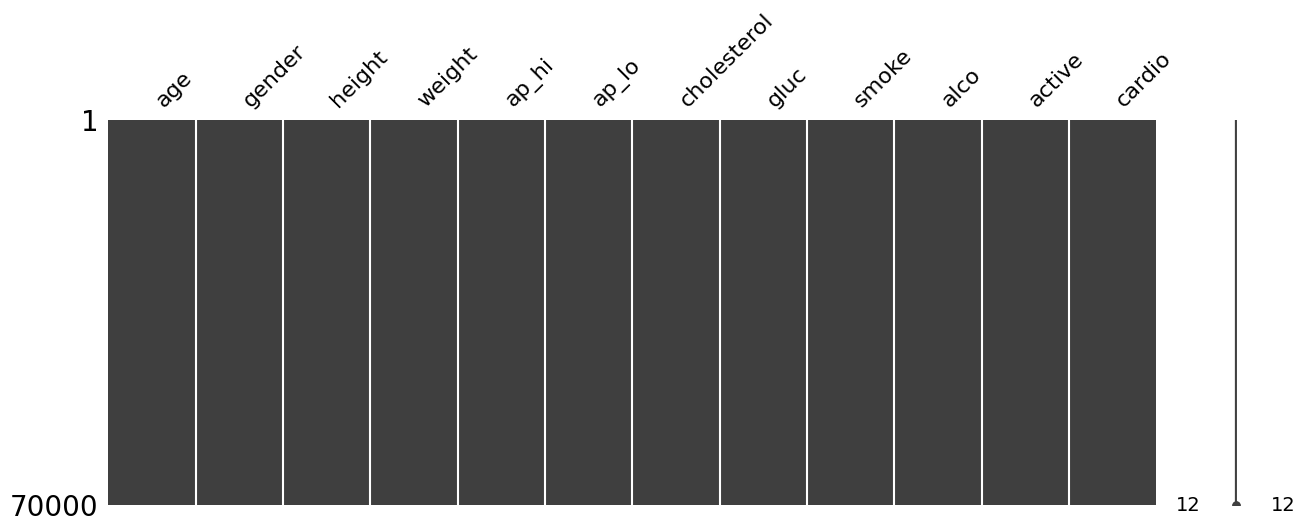

In [8]:
# Visualizing the missing values using the matrix plot
msno.matrix(df,figsize=(15,5))

In [9]:
duplicate_count = df.duplicated().sum()
if duplicate_count>0:
  df.drop_duplicates(inplace=True)
  print(f"{duplicate_count} duplicate values removed")
else:
  print("There are no duplicate values")

24 duplicate values removed

In [10]:
df.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1


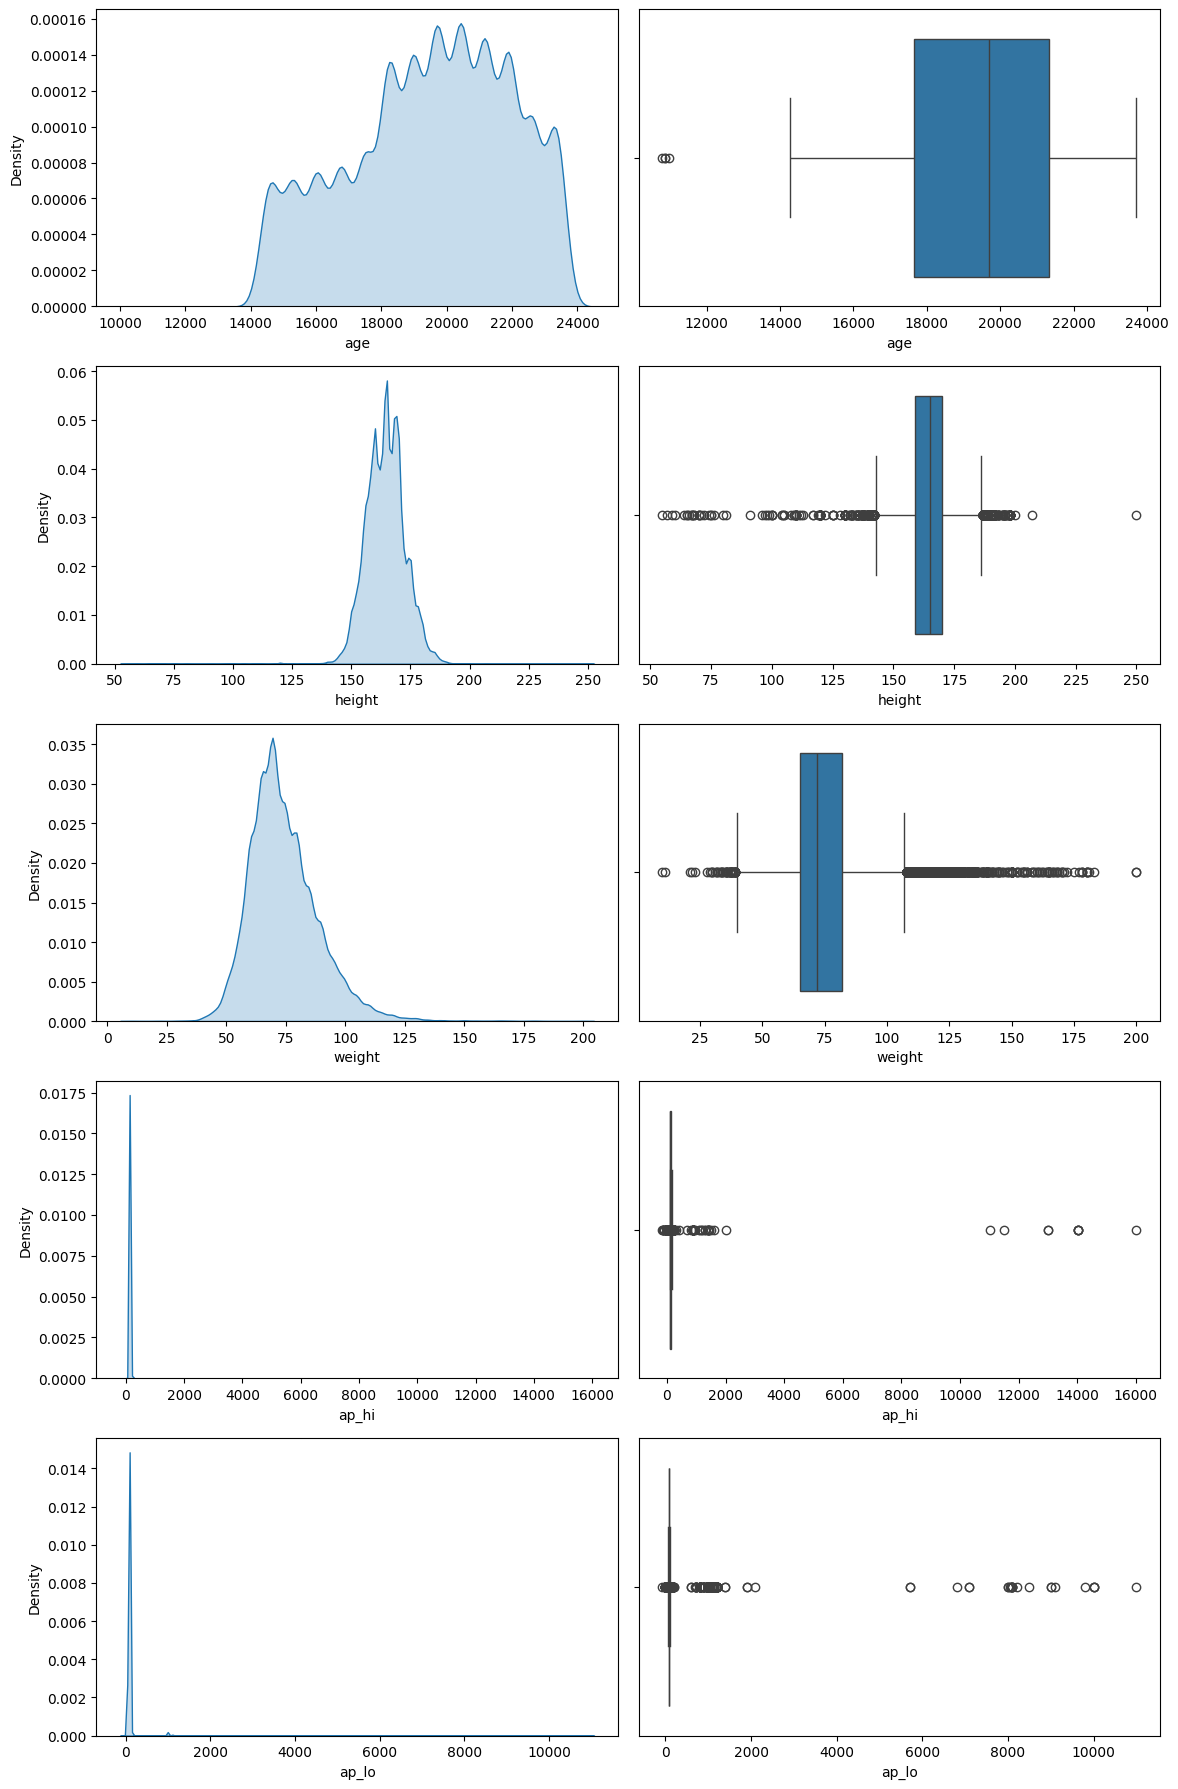

In [11]:
fig, axs = plt.subplots(5, 2, figsize=(12, 18))

# Plotting price
sns.kdeplot(df['age'], ax=axs[0, 0], fill=True)
sns.boxplot(data=df, x='age', ax=axs[0, 1])

# Plotting height
sns.kdeplot(df['height'], ax=axs[1,0], fill=True)
sns.boxplot(data=df, x='height', ax=axs[1, 1])

# Plotting weight
sns.kdeplot(df['weight'], ax=axs[2, 0], fill=True)
sns.boxplot(data=df, x='weight', ax=axs[2, 1])

# Plotting ap_hi
sns.kdeplot(df['ap_hi'], ax=axs[3, 0], fill=True)
sns.boxplot(data=df, x='ap_hi', ax=axs[3, 1])

# Plotting ap_lo
sns.kdeplot(df['ap_lo'], ax=axs[4, 0], fill=True)
sns.boxplot(data=df, x='ap_lo', ax=axs[4, 1])

plt.tight_layout()
plt.show()

In [12]:
# Removing the extreme outliers
df = df[(df['ap_hi'] > 0) & (df['ap_hi'] < 250)]
df = df[(df['ap_lo'] > 0) & (df['ap_lo'] < 500)]

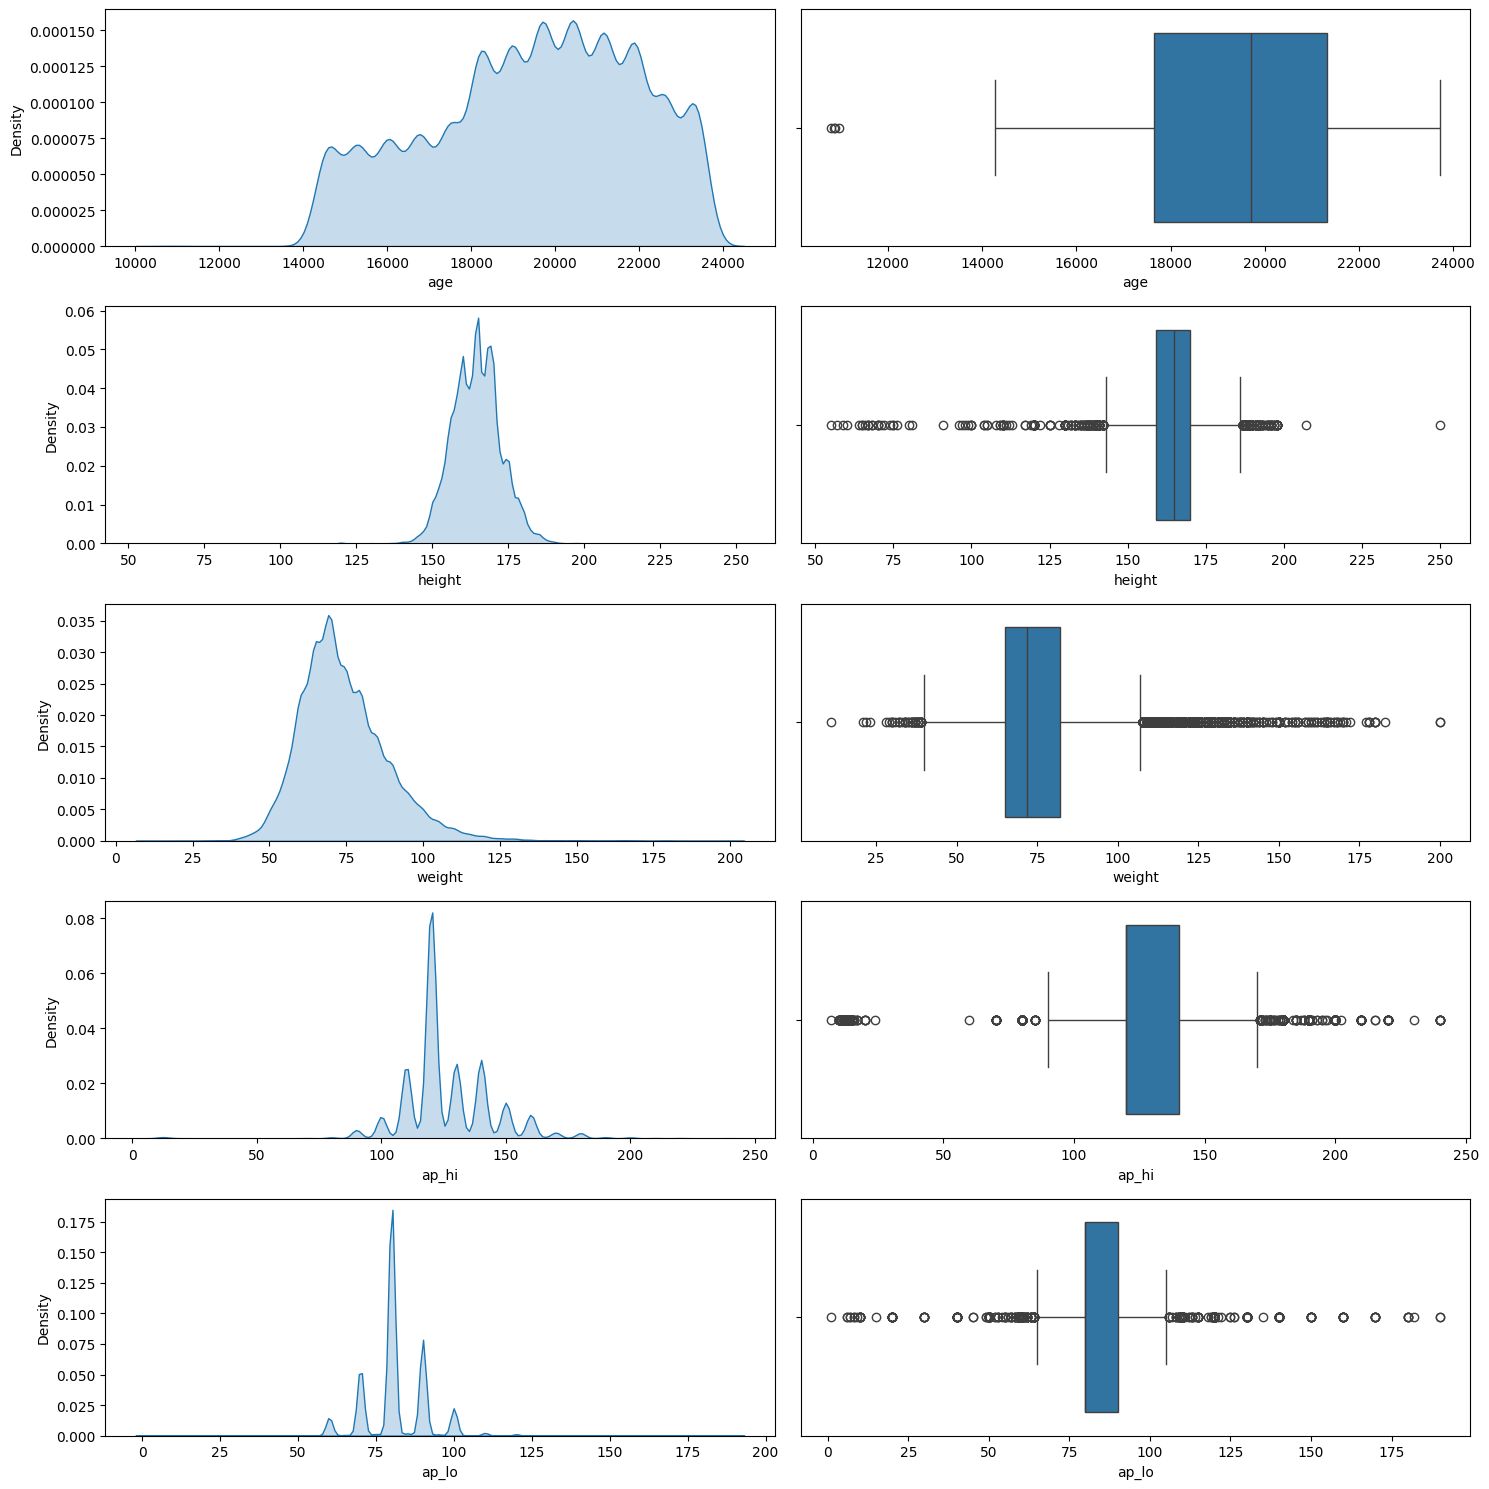

In [13]:
fig, axs = plt.subplots(5, 2, figsize=(15, 15))

# Plotting price
sns.kdeplot(df['age'], ax=axs[0, 0], fill=True)
sns.boxplot(data=df, x='age', ax=axs[0, 1])

# Plotting height
sns.kdeplot(df['height'], ax=axs[1,0], fill=True)
sns.boxplot(data=df, x='height', ax=axs[1, 1])

# Plotting weight
sns.kdeplot(df['weight'], ax=axs[2, 0], fill=True)
sns.boxplot(data=df, x='weight', ax=axs[2, 1])

# Plotting ap_hi
sns.kdeplot(df['ap_hi'], ax=axs[3, 0], fill=True)
sns.boxplot(data=df, x='ap_hi', ax=axs[3, 1])

# Plotting ap_lo
sns.kdeplot(df['ap_lo'], ax=axs[4, 0], fill=True)
sns.boxplot(data=df, x='ap_lo', ax=axs[4, 1])

plt.tight_layout()
plt.show()

In [14]:
df.shape

(68961, 12)

In [15]:
# Features for pie charts
features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Creating interactive subplots for pie charts using Plotly
fig = make_subplots(rows=2, cols=3, subplot_titles=features, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],
                                                                     [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# Plotting pie charts
for i, feature in enumerate(features):
    data = df[feature].value_counts()
    row = (i // 3) + 1
    col = (i % 3) + 1
    fig.add_trace(go.Pie(labels=data.index, values=data.values, name=feature.capitalize()), row=row, col=col)

# Updating layout for better spacing and title
fig.update_layout(title_text="Distribution of Features", height=700, showlegend=False)

# Show the interactive plot
fig.show()

### Processing the data

- Feature Scaling : `age`,`height`,`weight`,`ap_hi` and `ap_lo`
-

In [16]:
columns = ['cholesterol', 'gluc','weight','age','height', 'ap_hi', 'ap_lo', 'gender', 'alco', 'active', 'cardio']

# Rearranging the DataFrame columns
df = df[columns]

In [17]:
X = df.drop(['cardio'],axis=1)
y = df['cardio']

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)
print(X_train.shape)
print(X_test.shape)

(55168, 10)

(13793, 10)

weight,age,height,ap_hi,ap_lo,cholestrol,gluc,gender,alco,active

In [18]:
# Column transformer for doing ordinal and nominal encoding
encoding_transformer = ColumnTransformer(transformers=[
    ('Encode_cholesterol', OrdinalEncoder(categories=[['1', '2', '3']],
                                     handle_unknown="use_encoded_value", unknown_value=np.nan), [0]),

    ('Encode_gluc', OrdinalEncoder(categories=[['1', '2', '3']],
                                     handle_unknown="use_encoded_value", unknown_value=np.nan), [1]),
], remainder='passthrough')


# Column transformer for doing feature scaling
scaling_transformer = ColumnTransformer(transformers = [
    ('Standardization',StandardScaler(),[2]),
    ('MinMaxScaling',MinMaxScaler(copy=False),[3,4,5,6])],remainder='passthrough')


# Stacking column transformers to create a Processing pipeline
Processing_pipeline = Pipeline(steps = [('Encoding',encoding_transformer),
                                        ('Transformation',scaling_transformer),
                             ('Scaling',scaling_transformer)],memory='Temp')

In [19]:
# Transforming the input data
X_train_processed = Processing_pipeline.fit_transform(X_train,y_train)

# Processing the test data
X_test_processed = Processing_pipeline.transform(X_test)

In [20]:
import pickle
# Save the data to a file using pickle
with open('Pipeline.pkl', 'wb') as file:
    pickle.dump(Processing_pipeline, file)

### Model training: Comparision

In [21]:
# Dictionary of classification models with tuning for faster training
model_dict = {
    'logistic_regression': LogisticRegression(solver='lbfgs', max_iter=100, random_state=42),
    'svc': SVC(probability=True, kernel='linear', random_state=42),
    'decision_tree': DecisionTreeClassifier(max_depth=3, random_state=42),
    'random_forest': RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42)
}

output = []

# Iterate through models
for model_name, model in model_dict.items():

    # Training the model
    model.fit(X_train_processed, y_train)

    # Making predictions
    y_pred = model.predict(X_test_processed)

    # Calculate additional classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')

    # Use 'macro' for f1_score if it's a multiclass problem, otherwise use 'binary' for binary classification
    if len(set(y_train)) > 2:  # Assuming y_train and y_test are similar in class distribution
        f1 = f1_score(y_test, y_pred, average='macro')
    else:
        f1 = f1_score(y_test, y_pred, average='binary')

    # Append model name and metrics to output list
    output.append([model_name, accuracy, precision, recall, f1])


In [ ]:
# Create a DataFrame from the output
results_df = pd.DataFrame(output, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Display the DataFrame
model_df_sorted = results_df.sort_values(['Accuracy'], ascending=False)
model_df_sorted

## **Conclusion:**

#### In this cardiovascular disease prediction model, four different machine learning models were trained and evaluated using base parameters: Logistic Regression, Random Forest, Support Vector Classifier (SVC), and Decision Tree. Among these, Logistic Regression performed best with an accuracy of 72.41%, a precision of 72.65%, recall of 72.26%, and F1-score of 70.08%. Overall, Logistic Regression demonstrated the most balanced performance across all metrics.

DNN

In [ ]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install rich
# %pip install tensorflow
# %pip install scikit-learn

In [ ]:
# For data manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing modules for the DNN model training
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.layers import Dense
from keras.optimizers import Adam

# Importing modules for the data preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from rich import print
print("Everything is imported ✅")

In [ ]:
# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(11,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

print(model.summary())

In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Print final training and validation metrics
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

RNN & LSTM

In [ ]:
# Assuming you have already imported necessary libraries and preprocessed your data

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SimpleRNN
import numpy as np

# Reshape your input data for RNN/LSTM
# Assuming X_train_processed is your feature set
# Reshape to [samples, time steps, features]
X_train_rnn = X_train_processed.reshape((X_train_processed.shape[0], 1, X_train_processed.shape[1]))
X_test_rnn = X_test_processed.reshape((X_test_processed.shape[0], 1, X_test_processed.shape[1]))

# RNN Model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dropout(0.3))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the RNN model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the RNN model
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
lstm_model.add(Dropout(0.3))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_history = lstm_model.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Optionally, you can plot the training history for both models
import matplotlib.pyplot as plt

# Plot RNN training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot LSTM training history
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()